In [1]:
import pandas as pd

gold=pd.read_csv('cleaned_gold.csv')
gold

,Unnamed: 0,Date,Price,Open,High,Low,Vol.,Change %
0,0,2019-12-31,142.900,143.310000,143.600,142.800000,5.31M,0.19%
1,1,2020-01-01,143.425,143.585000,143.905,143.100000,NaN,NaN
2,2,2020-01-02,143.950,143.860000,144.210,143.400000,7.74M,0.73%
3,3,2020-01-03,145.860,145.750000,146.320,145.400000,12.29M,1.33%
4,4,2020-01-04,146.370,146.646667,147.040,145.916667,NaN,NaN
...,...,...,...,...,...,...,...,...
362,362,2020-12-27,175.870,176.832500,177.525,175.600000,NaN,NaN
363,363,2020-12-28,175.710,177.260000,177.910,175.630000,7.77M,-0.36%
364,364,2020-12-29,176.350,176.250000,176.970,175.570000,5.98M,0.36%
365,365,2020-12-30,177.700,176.440000,177.720,176.440000,5.58M,0.77%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/home/atanczos/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'Stock Price ($)')

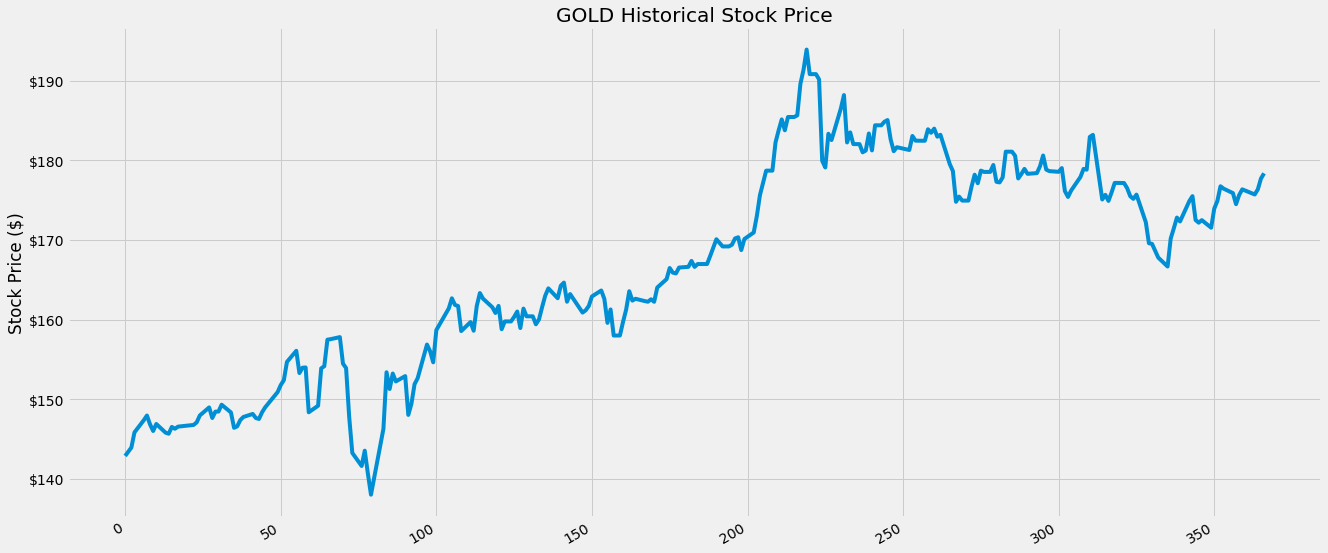

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import style

style.use('fivethirtyeight')



gold['Price'].plot(figsize=(20,10))
ax = plt.subplot()
plt.gcf().autofmt_xdate()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))) # y-axis in dollars
plt.title('GOLD Historical Stock Price')
plt.ylabel('Stock Price ($)')

/home/atanczos/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0, 0.5, 'Stock Price ($)')

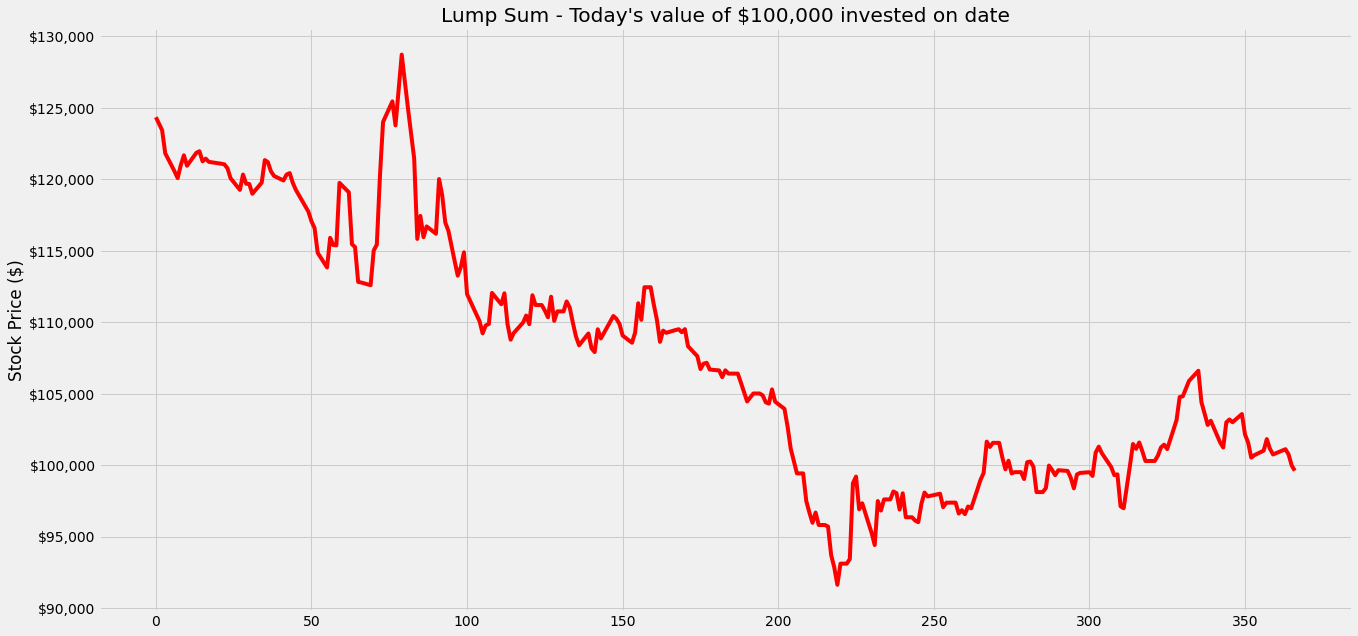

In [3]:
today_price = gold['Price'][365] # The final value of our stock (Nov 28, 2016)
initial_investment = 100000 # Our $100,000 windfall

num_stocks_bought = initial_investment / gold['Price']
lumpsum = num_stocks_bought * today_price

lumpsum.plot(figsize=(20,10), color='r')
ax = plt.subplot()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
plt.title("Lump Sum - Today's value of $100,000 invested on date")
plt.ylabel('Stock Price ($)')

In [4]:
today_price = gold['Price'][365] # The final value of our stock (Nov 28, 2016)
initial_investment = 100000 # Our $100,000 windfall

amundi=pd.read_csv('cleaned_stocks.csv')
db=pd.read_csv('cleaned_public_bonds.csv')
ishares=pd.read_csv('cleaned_corporate_bonds.csv')
dollar=pd.read_csv('cleaned_cash.csv')

portfolios=pd.read_csv('portfolio_allocations.csv')
print(portfolios[2:3])
row=portfolios[:3]
print(row.loc[2][1])

assets=[gold,amundi,db,ishares,dollar]

print(assets[0]['Price'][365])
lastValue=len(assets[0]['Price'])
lastValue-=1
print(lastValue)
print(assets[0]['Price'][lastValue])

portfolio_trading=[]
portfolio_trading_all=[]
for i in range(10625):
  for j in range(1,6):
    postotak=portfolios.loc[i][j]/100
    num_stocks_bought = (initial_investment*postotak) / assets[j-1]['Price'][0]
    lastValue=len(assets[j-1]['Price'])
    lumpsum = postotak * assets[j-1]['Price'][lastValue-1]
    portfolio_trading+=[lumpsum]
  portfolio_trading_all+=[portfolio_trading]
  portfolio_trading=[]

print(portfolio_trading_all)
num_stocks_bought = initial_investment / gold['Price'][0]
lumpsum = num_stocks_bought * today_price

lumpsum


   Unnamed: 0  ST  CB  PB  GO  CA
2           2   0   0   0  10  90
0
177.7
366
178.36
[[0.0, 0.0, 0.0, 0.0, 89.94], [0.0, 0.0, 0.0, 4.031000000000001, 85.443], [0.0, 0.0, 0.0, 8.062000000000001, 80.946], [0.0, 0.0, 0.0, 12.093, 76.449], [0.0, 0.0, 0.0, 16.124000000000002, 71.952], [0.0, 0.0, 0.0, 20.155, 67.455], [0.0, 0.0, 0.0, 24.186, 62.95799999999999], [0.0, 0.0, 0.0, 28.217, 58.461], [0.0, 0.0, 0.0, 32.248000000000005, 53.964], [0.0, 0.0, 0.0, 36.279, 49.467000000000006], [0.0, 0.0, 0.0, 40.31, 44.97], [0.0, 0.0, 0.0, 44.34100000000001, 40.473], [0.0, 0.0, 0.0, 48.372, 35.976], [0.0, 0.0, 0.0, 52.403000000000006, 31.478999999999996], [0.0, 0.0, 0.0, 56.434, 26.982], [0.0, 0.0, 0.0, 60.465, 22.485], [0.0, 0.0, 0.0, 64.49600000000001, 17.988], [0.0, 0.0, 0.0, 68.527, 13.491], [0.0, 0.0, 0.0, 72.558, 8.994], [0.0, 0.0, 0.0, 76.589, 4.497], [0.0, 0.0, 0.0, 80.62, 0.0], [0.0, 0.0, 12.692, 0.0, 85.443], [0.0, 0.0, 12.692, 4.031000000000001, 80.946], [0.0, 0.0, 12.692, 8.062000000000001

124352.69419174246

In [50]:
today_price = gold['Price'][365] # The final value of our stock (Nov 28, 2016)
initial_investment = 100000 # Our $100,000 windfall


#cost se racuna at the END of the periood
amundi=pd.read_csv('cleaned_stocks.csv')
db=pd.read_csv('cleaned_public_bonds.csv')
ishares=pd.read_csv('cleaned_corporate_bonds.csv')
ishares.drop([1])
gold.drop([1])
db.drop([1])
amundi.drop([1])
dollar=pd.read_csv('cleaned_cash.csv')


portfolios=pd.read_csv('portfolio_allocations.csv')
print(portfolios[2:3])
row=portfolios[:3]
print(row.loc[2][1])

assets=[gold,amundi,db,ishares,dollar]

print(assets[0]['Price'][365])
lastValue=len(assets[0]['Price'])
lastValue-=1
print(lastValue)
print(assets[0]['Price'][lastValue])


# cost for 1 off without rebalance
portfolio_trading=[]
portfolio_trading_all=[]
finish_weights=[]
volatility_values=[] #
cost_of_portfolio=0
for i in range(10625):
    for j in range(1,6):
        postotak=portfolios.loc[i][j]/100
        num_stocks_bought = (initial_investment*postotak) / assets[j-1]['Price'][0]
        lastValue=len(assets[j-1]['Price'])
        asset_value = num_stocks_bought * assets[j-1]['Price'][lastValue-1]
        portfolio_trading+=[asset_value]

    for j in range(1,6):
        finish_weights+=[portfolio_trading[j-1]/sum(portfolio_trading)]
    cost_of_portfolio=0
    for j in range(1,6):
        lastValue=len(assets[j-1]['Price'])
        cost_of_portfolio+=finish_weights[j-1]*assets[j-1]['Price'][lastValue-1]
    portfolio_trading_all+=[cost_of_portfolio]
    portfolio_trading=[]
    finish_weights=[]

print(portfolio_trading_all)





   Unnamed: 0  ST  CB  PB  GO  CA
2           2   0   0   0  10  90
0
178.36
365
178.36
[89.94, 89.42325305244472, 88.9123958467095, 88.40732825886275, 87.90795242162318, 87.41417266113888, 86.92589543588, 86.44302927756297, 85.96548473402807, 85.493174313995, 85.02601243362538, 84.56391536482295, 84.1068011852066, 83.6545897296929, 83.20720254362807, 82.76456283741227, 82.32659544256063, 81.89322676914828, 81.46438476458916, 81.03999887369946, 80.62, 98.72144781076868, 98.15649339936438, 97.59795420818442, 97.04572158410969, 96.49968931389063, 95.9597535560438, 95.42581277501651, 94.89776767753301, 94.37552115103679, 93.85897820415053, 93.34804590907568, 92.84263334585913, 92.34265154845626, 91.84801345252373, 91.35863384487699, 90.87442931455121, 90.39531820540692, 89.92122057022323, 89.4520581262246, 88.9877542119895, 107.43699488395842, 106.8245676190399, 106.21906884312286, 105.62038164285708, 105.02839172061954, 104.44298732176858, 103.86405916431238, 103.29150037089863, 102.7252

In [87]:



import numpy as np


num_stocks_bought=[]
volatility_value=0
volatility_values=np.array([])
vol=[]
for i in range(10625):
  num_stocks_bought=[]
  for j in range(1,6):
          postotak=portfolios.loc[i][j]/100
          num_stocks_bought+=[(initial_investment*postotak) / assets[j-1]['Price'][0]]

  for k in range(len(assets[0]['Price'])):
    for j in range(1,6):
      volatility_value+=num_stocks_bought[j-1]*assets[j-1]['Price'][k]
    volatility_values=np.append(volatility_values,volatility_value)
    volatility_value=0
  vol+=[np.std(volatility_values)/np.mean(volatility_values)*100]
  volatility_values=np.array([])
  num_stocks_bought=[]

print(vol)


[3.30850156108174, 3.08781479445925, 2.8720570686879534, 2.662108357956628, 2.45911656665264, 2.2645886172816403, 2.080508367222787, 1.9094787442495549, 1.7548674875620205, 1.620896461131733, 1.5125489733081208, 1.435108695441395, 1.393199022032509, 1.389505223250281, 1.4238122787512795, 1.493021694536393, 1.5921437133503322, 1.715594260433516, 1.8581597218604111, 2.0154501628909745, 2.1839788062898196, 3.1988244522537728, 2.9797914705149573, 2.765968477653507, 2.5583332055390824, 2.358168657970676, 2.1671679381594835, 1.987568071404409, 1.8223054059683397, 1.6751586971757821, 1.5507922147290607, 1.4545336515216782, 1.3916838544393442, 1.3663149820417755, 1.379963393170175, 1.4310078663941916, 1.5152037154847142, 1.6269808033875046, 1.760700521847184, 1.9114053478082587, 2.0750724874381445, 3.0906383285956616, 2.8734028221645738, 2.661700039803294, 2.456621040291603, 2.259605665016264, 2.072562787734154, 1.8980206047398762, 1.7392917212885162, 1.6005996342117097, 1.4870427297696787, 1.

In [88]:
#cost one-off with rebalance

import numpy as np


num_stocks_bought=[]
volatility_value=0
volatility_values2=np.array([])
vol2=[]

no_of_shares=[]
portfolio_trading=[]
portfolio_trading_all2=[]
num_stocks_bought=[]
value=[]
weights=[]
cost_of_portfolio=0
finish_weights=[]
for i in range(10625): #za svaki portfolio
    for j in range(1,6): 
      percentage=portfolios.loc[i][j]/100
      num_stocks_bought += [(initial_investment*percentage) / assets[j-1]['Price'][0]]
    for k in range(len(assets[0]['Price'])):  #za svaki dan
        datum=assets[0]['Date'][k].split("-")
        if len(datum)==0 or len(datum)==1:
            datum=assets[j-1]['Date'][k].split("/")
        if datum[1]=="15":
            value=[]
            weights=[]
            for z in range(1,6):
                value+=[num_stocks_bought[z-1]* assets[z-1]['Price'][k]]
            for z in range(1,6):
                weights+=[value[z-1]/sum(value)]
            thesum=sum(value)
            for z in range(1,6):
                diff=portfolios.loc[i][z]/100-weights[z-1]
                value[z-1]+=diff*thesum
                num_stocks_bought[z-1]=value[z-1]/assets[z-1]['Price'][k]
        for z in range(1,6):
          volatility_value+=num_stocks_bought[j-1]*assets[j-1]['Price'][k]
        volatility_values2=np.append(volatility_values2,volatility_value)
        volatility_value=0
    vol2+=[np.std(volatility_values2)/np.mean(volatility_values2)*100]
    volatility_values2=np.array([])
  
    
    for j in range(1,6):
        lastValue=len(assets[j-1]['Price'])
        asset_value = num_stocks_bought[j-1] * assets[j-1]['Price'][lastValue-1]
        portfolio_trading+=[asset_value]

    for j in range(1,6):
        finish_weights+=[portfolio_trading[j-1]/sum(portfolio_trading)]
    cost_of_portfolio=0
    for j in range(1,6):
        lastValue=len(assets[j-1]['Price'])
        cost_of_portfolio+=finish_weights[j-1]*assets[j-1]['Price'][lastValue-1]
    portfolio_trading_all2+=[cost_of_portfolio]
    portfolio_trading=[]
    finish_weights=[]
    num_stocks_bought=[]

print(portfolio_trading_all2)
print(vol2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars


[89.94, 89.47216358741642, 89.00452120295962, 88.53707272594926, 88.06981803580504, 87.60275701204661, 87.13588953429351, 86.66921548226496, 86.20273473577993, 85.73644717475682, 85.27035267921354, 84.8044511292673, 84.33874240513458, 83.87322638713096, 83.40790295567106, 82.94277199126842, 82.47783337453538, 82.01308698618308, 81.54853270702118, 81.08417041795795, 80.62, 98.13822813755503, 97.66870105896255, 97.19936870563967, 96.73023095647495, 96.26128769045732, 95.79253878667612, 95.32398412432076, 94.85562358268086, 94.38745704114604, 93.91948437920571, 93.4517054764492, 92.98412021256547, 92.51672846734304, 92.04953012066997, 91.58252505253364, 91.11571314302077, 90.6490942723172, 90.18266832070789, 89.71643516857672, 89.25039469640646, 106.33611634435044, 105.86489874033849, 105.39387655865173, 104.92304967774771, 104.45241797618472, 103.98198133262176, 103.51173962581827, 103.04169273463431, 102.57184053803019, 102.10218291506649, 101.63271974490397, 101.16345090680336, 100.694

In [23]:
#DCA without rebalance

#100.000/12 first day of each month
volatility_value=0
volatility_values3=[]
no_of_shares=[]
portfolio_trading=[]
portfolio_trading_all3=[]
finish_weights=[]
cost_of_portfolio=0
for i in range(10625):
    for j in range(1,6):
      num_stocks_bought=0
      for k in range(len(assets[j-1]['Price'])):
        datum=assets[j-1]['Date'][k].split("-")
        if len(datum)==0 or len(datum)==1:
          datum=assets[j-1]['Date'][k].split("/")
        if datum[1]=="1":
          postotak=portfolios.loc[i][j]/100
          num_stocks_bought += (initial_investment/12*postotak) / assets[j-1]['Price'][k]
      no_of_shares+=[num_stocks_bought]
      lastValue=len(assets[j-1]['Price'])
      asset_value = num_stocks_bought * assets[j-1]['Price'][lastValue-1]
      portfolio_trading+=[asset_value]
    for j in range(1,6):
        finish_weights+=[portfolio_trading[j-1]/sum(portfolio_trading)]
    cost_of_portfolio=0
    for j in range(1,6):
        lastValue=len(assets[j-1]['Price'])
        cost_of_portfolio+=finish_weights[j-1]*assets[j-1]['Price'][lastValue-1]
    if cost_of_portfolio== None:
      print('s')
    portfolio_trading_all3+=[cost_of_portfolio]
    portfolio_trading=[]
    finish_weights=[]

print(portfolio_trading_all3)

[89.94, 89.44273222009959, 88.94896426932728, 88.45865932893673, 87.97178109482891, 87.48829376859108, 87.0081620487228, 86.53135112204367, 86.05782665527897, 85.58755478681846, 85.12050211864468, 84.6566357084262, 84.1959230617723, 83.73833212464507, 83.28383127592517, 82.83238932012776, 82.38397548026495, 81.93855939085148, 81.49611109105007, 81.05660101795353, 80.62, 98.43308317338683, 97.90682802214862, 97.38426967569956, 96.86536931675028, 96.35008866956969, 95.83838999057335, 95.33023605910765, 94.8255901684245, 94.3244161168425, 93.82667819909003, 93.33234119782534, 92.84137037533057, 92.35373146537418, 91.86939066523892, 91.3883146279108, 90.91047045442572, 90.43582568636947, 89.96434829852826, 89.49600669168564, 89.03076968556267, 106.89370999869821, 106.33869204442749, 105.78756554860115, 105.24028972727957, 104.69682436444702, 104.15712980216043, 103.62116693090243, 103.0888971801339, 102.56028250904106, 102.03528539747262, 101.51386883706229, 100.99599632253226, 100.4816318

In [97]:
import numpy as np


num_stocks_bought=[]
volatility_value=0
volatility_values3=np.array([])
vol3=[]
for i in range(10625):
    for k in range(len(assets[0]['Price'])):
        for j in range(1,6):
            datum=assets[j-1]['Date'][k].split("-")
            if len(datum)==0 or len(datum)==1:
                datum=assets[j-1]['Date'][k].split("/")
            if datum[1]=="1":
                postotak=portfolios.loc[i][j]/100
                num_stocks_bought += [(initial_investment/12*postotak) / assets[j-1]['Price'][k]]
            volatility_value+=num_stocks_bought[j-1]*assets[j-1]['Price'][k]
        volatility_values3=np.append(volatility_values3,volatility_value)
        volatility_value=0
    vol3+=[np.std(volatility_values3)/np.mean(volatility_values3)*100]
    volatility_values3=np.array([])
    num_stocks_bought=[]

print(vol3)



[3.3085015610817408, 3.0878147944592493, 2.8720570686879534, 2.662108357956628, 2.45911656665264, 2.2645886172816407, 2.0805083672227864, 1.9094787442495549, 1.7548674875620198, 1.6208964611317334, 1.5125489733081203, 1.4351086954413954, 1.3931990220325097, 1.3895052232502807, 1.4238122787512801, 1.4930216945363928, 1.5921437133503327, 1.7155942604335148, 1.8581597218604105, 2.015450162890975, 2.18397880628982, 3.198824452253772, 2.9797914705149573, 2.765968477653506, 2.558333205539083, 2.3581686579706767, 2.1671679381594835, 1.9875680714044097, 1.82230540596834, 1.6751586971757833, 1.550792214729061, 1.4545336515216776, 1.3916838544393442, 1.3663149820417761, 1.3799633931701738, 1.4310078663941912, 1.5152037154847144, 1.6269808033875042, 1.760700521847183, 1.9114053478082582, 2.075072487438145, 3.090638328595662, 2.8734028221645747, 2.6617000398032946, 2.4566210402916044, 2.259605665016263, 2.072562787734154, 1.898020604739875, 1.7392917212885166, 1.60059963421171, 1.4870427297696782,

In [ ]:
for i in range(10625):
  difference=portfolio_trading_all[i]-portfolio_trading_all2[i]
  if difference>0:
    print('ok')

In [90]:
#DCA with rebalance

#DCA with rebalance

#100.000/12 first day of each month
#100.000/12 first day of each month

import numpy as np


num_stocks_bought=[]
volatility_value=0
volatility_values4=np.array([])
vol4=[]

no_of_shares=[]
portfolio_trading=[]
portfolio_trading_all4=[]
finish_weights=[]
value=[]
weights=[]
ulog=[]
cost_of_portfolio=0
finish_weights=[]
for i in range(10625): #za svaki portfolio
    for k in range(len(assets[0]['Price'])):  #za svaki dan
        for j in range(1,6):                    #za svaki asset
            datum=assets[j-1]['Date'][k].split("-")
            if len(datum)==0 or len(datum)==1:
                datum=assets[j-1]['Date'][k].split("/")
            if datum[1]=="1" and k==0: #ako je prvi u mjesecu i prvi put gledam
                postotak=portfolios.loc[i][j]/100
                num_stocks_bought += [(initial_investment/12*postotak) / assets[j-1]['Price'][k]] #stavljam koliko stockova imam
            if datum[1]=="1" and k!=0:
                postotak=portfolios.loc[i][j]/100
                num_stocks_bought[j-1] += (initial_investment/12*postotak) / assets[j-1]['Price'][k]
            volatility_value+=num_stocks_bought[j-1]*assets[j-1]['Price'][k]
        volatility_values4=np.append(volatility_values4,volatility_value)
        volatility_value=0
        datum=assets[0]['Date'][k].split("-")
        if len(datum)==0 or len(datum)==1:
            datum=assets[j-1]['Date'][k].split("/")
        if datum[1]=="15":
            value=[]
            weights=[]
            for z in range(1,6):
                value+=[num_stocks_bought[z-1]* assets[z-1]['Price'][k]]
            for z in range(1,6):
                weights+=[value[z-1]/sum(value)]
            thesum=sum(value)
            for z in range(1,6):
                diff=portfolios.loc[i][z]/100-weights[z-1]
                if diff!=0:
                  value[z-1]+=diff*thesum
                  num_stocks_bought[z-1]=value[z-1]/assets[z-1]['Price'][k]


    vol4+=[np.std(volatility_values4)/np.mean(volatility_values4)*100]
    volatility_values4=np.array([])

    for j in range(1,6):
        lastValue=len(assets[j-1]['Price'])
        asset_value = num_stocks_bought[j-1] * assets[j-1]['Price'][lastValue-1]
        portfolio_trading+=[asset_value]

    for j in range(1,6):
        finish_weights+=[portfolio_trading[j-1]/sum(portfolio_trading)]
    cost_of_portfolio=0
    for j in range(1,6):
        lastValue=len(assets[j-1]['Price'])
        cost_of_portfolio+=finish_weights[j-1]*assets[j-1]['Price'][lastValue-1]
    portfolio_trading_all4+=[cost_of_portfolio]
    portfolio_trading=[]
    finish_weights=[]
    num_stocks_bought=[]

print(portfolio_trading_all4)
print(vol4)

[89.94, 89.47216358741642, 89.00452120295964, 88.53707272594926, 88.06981803580504, 87.60275701204661, 87.13588953429351, 86.66921548226497, 86.20273473577993, 85.73644717475682, 85.27035267921354, 84.8044511292673, 84.33874240513458, 83.87322638713096, 83.40790295567103, 82.9427719912684, 82.47783337453538, 82.01308698618308, 81.54853270702118, 81.08417041795795, 80.62, 98.13822813755502, 97.66870105896257, 97.19936870563967, 96.73023095647495, 96.26128769045735, 95.79253878667612, 95.32398412432076, 94.85562358268088, 94.38745704114604, 93.91948437920573, 93.4517054764492, 92.98412021256547, 92.51672846734303, 92.04953012066994, 91.58252505253364, 91.11571314302077, 90.64909427231721, 90.18266832070789, 89.71643516857671, 89.25039469640647, 106.33611634435043, 105.86489874033849, 105.39387655865173, 104.92304967774771, 104.45241797618473, 103.98198133262173, 103.51173962581828, 103.0416927346343, 102.5718405380302, 102.10218291506649, 101.63271974490397, 101.16345090680338, 100.69437

In [102]:

import pandas as pd

final_array_volatility=[]
df2= pd.DataFrame(columns=['1-OFF-NO', '1-OFF-YES', 'DCA-NO', 'DCA-YES'])
for i in range(10625):
  final_array_volatility+=[[vol[i],vol2[i],vol3[i],vol4[i]]]
print(len(df2))
for row in final_array_volatility:
    df2.loc[len(df2)]=row

print(df2)
df2.to_csv("volatility")

0
       1-OFF-NO  1-OFF-YES    DCA-NO    DCA-YES
0      3.308502   3.308502  3.308502  51.106194
1      3.087815   3.095597  3.087815  51.189446
2      2.872057   2.887087  2.872057  51.272666
3      2.662108   2.683858  2.662108  51.355853
4      2.459117   2.487057  2.459117  51.439004
...         ...        ...       ...        ...
10620  7.413765        NaN  7.413765  53.983585
10621  7.408817   7.858586  7.408817  53.534073
10622  7.571532        NaN  7.571532  53.618940
10623  7.483826        NaN  7.483826  53.578738
10624  7.631049        NaN  7.631049  53.824637

[10625 rows x 4 columns]


In [55]:

import pandas as pd

final_array=[]
df= pd.DataFrame(columns=['1-OFF-NO', '1-OFF-YES', 'DCA-NO', 'DCA-YES'])
for i in range(10625):
  final_array+=[[portfolio_trading_all[i],portfolio_trading_all2[i],portfolio_trading_all3[i],portfolio_trading_all4[i]]]
print(len(df))
for row in final_array:
    df.loc[len(df)]=row

print(df)
df.to_csv("cost_final")
  

0
         1-OFF-NO   1-OFF-YES      DCA-NO     DCA-YES
0       89.940000   89.940000   89.940000   89.940000
1       89.423253   89.472164   89.442732   89.472164
2       88.912396   89.004521   88.948964   89.004521
3       88.407328   88.537073   88.458659   88.537073
4       87.907952   88.069818   87.971781   88.069818
...           ...         ...         ...         ...
10620  180.621363  180.947568  204.580000  180.947568
10621  175.000887  174.067271   89.940000  174.067271
10622  174.236778  173.596063   80.620000  173.596063
10623  181.435503  182.025947  253.840000  182.025947
10624  179.482107  179.652841  204.580000  179.652841

[10625 rows x 4 columns]


In [71]:
import numpy as np

arr0=np.array([])
arr1=np.array([])
arr2=np.array([])
arr3=np.array([])
arr4=np.array([])


for i in range(len(assets[0]['Price'])):
  arr0=np.append(arr0,assets[0]['Price'][i])
  arr1=np.append(arr1,assets[1]['Price'][i])
  arr2=np.append(arr2,assets[2]['Price'][i])
  arr3=np.append(arr3,assets[3]['Price'][i])
  arr4=np.append(arr4,assets[4]['Price'][i])

arrays=[arr0,arr1,arr2,arr3,arr4]
means=[]
for i in range(5):
  means.append(np.mean(arrays[i]))
print(np.mean(arr0))
print(means[0])

deviations=[]
for i in range(5):
  deviations.append(np.std(arrays[i]))

print(np.std(arr0))
print(deviations[0])

asset_volatility=[]
for i in range(5):
  asset_volatility.append(deviations[i]/means[i]*100)

print(asset_volatility)


166.46222677595628
166.46222677595628
13.080636598265226
13.080636598265226
[7.8580209165834525, 7.801070163451136, 1.6203680985784885, 2.1839788062898196, 3.30850156108174]
